In [196]:
from pathlib import Path

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
DATA_PATH = Path('../data')

plt.rcParams['figure.figsize'] = (10, 8)

In [38]:
train_df = pd.read_csv(DATA_PATH/'train.csv')
valid_df = pd.read_csv(DATA_PATH/'valid.csv')
test_df = pd.read_csv(DATA_PATH/'test.csv', index_col=0)

In [40]:
text_cols = ['title', 'text']
split_col = 'split'
target_col = 'label'

In [107]:
train_df['split'] = 'train'
valid_df['split'] = 'valid'
test_df['split'] = 'test'

full_train_df = pd.concat([train_df, 
                           valid_df], axis=0, ignore_index=True)

full_df = pd.concat([train_df[text_cols + [split_col]], 
                     valid_df[text_cols + [split_col]],
                     test_df[text_cols + [split_col]]], axis=0, ignore_index=True)
full_df.head()

,title,text,split
0,China and Economic Reform: Xi Jinping’s Track ...,Economists generally agree: China must overhau...,train
1,Trade to Be a Big Topic in Theresa May’s U.S. ...,LONDON—British Prime Minister Theresa May said...,train
2,"The Top Beaches In The World, According To Nat...",Beaches come in all sorts of shapes and sizes ...,train
3,Sheriff’s Report Provides New Details on Tamir...,"A timeline of what happened after Tamir Rice, ...",train
4,Surgeon claiming he will transplant volunteer'...,An Italian neurosurgeon who has claimed for mo...,train


In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 4 columns):
label    24871 non-null object
title    19947 non-null object
text     24788 non-null object
split    24871 non-null object
dtypes: object(4)
memory usage: 777.3+ KB


In [109]:
train_df.describe()

,label,title,text,split
count,24871,19947,24788,24871
unique,3,19831,24781,1
top,news,NBC NewsVerifizierter Account,Now Playing: {{mainvideo.hed}} {{playlist[$ind...,train
freq,14650,19,2,24871


In [110]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 4 columns):
label    3552 non-null object
title    2833 non-null object
text     3541 non-null object
split    3552 non-null object
dtypes: object(4)
memory usage: 111.1+ KB


In [111]:
valid_df.describe()

,label,title,text,split
count,3552,2833,3541,3552
unique,3,2828,3541,1
top,news,NBC NewsVerifizierter Account,"Last Updated Dec 16, 2016 2:40 PM EST WASHINGT...",valid
freq,2088,3,1,3552


In [112]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5647 entries, 0 to 5646
Data columns (total 3 columns):
title    5647 non-null object
text     5629 non-null object
split    5647 non-null object
dtypes: object(3)
memory usage: 176.5+ KB


In [113]:
test_df.describe()

,title,text,split
count,5647,5629,5647
unique,5643,5627,1
top,North Korea nuclear: White House calls Senate ...,It's no secret that getting into college is gr...,test
freq,2,2,5647


**Label**

In [164]:
full_train_df['label'].value_counts()

news         16738
other         7394
clickbait     4291
Name: label, dtype: int64

In [165]:
full_train_df['label'].value_counts(normalize=True)

news         0.588889
other        0.260141
clickbait    0.150969
Name: label, dtype: float64

In [192]:
train_df['label'].value_counts()

news         14650
other         6473
clickbait     3748
Name: label, dtype: int64

In [193]:
train_df['label'].value_counts(normalize=True)

news         0.589039
other        0.260263
clickbait    0.150698
Name: label, dtype: float64

In [194]:
valid_df['label'].value_counts()

news         2088
other         921
clickbait     543
Name: label, dtype: int64

In [195]:
valid_df['label'].value_counts(normalize=True)

news         0.587838
other        0.259291
clickbait    0.152872
Name: label, dtype: float64

**Length**

In [166]:
full_df['title_length'] = full_df['title'].str.len()
full_df['text_length'] = full_df['text'].str.len()

In [167]:
full_df.groupby('split')[['title_length', 'text_length']].agg(['min', 'max', 'mean', 'median'])

title_length                           text_length            \
               min     max       mean median         min       max   
split                                                                
test           4.0  2091.0  71.504870   65.0        10.0   74614.0   
train          1.0  4038.0  72.561538   65.0         1.0  197624.0   
valid          2.0  2113.0  71.208613   65.0         3.0   76077.0   

                            
              mean  median  
split                       
test   3425.703677  2501.0  
train  2850.324835  1884.0  
valid  2871.595030  1944.0

In [170]:
full_train_df['title_length'] = full_train_df['title'].str.len()
full_train_df['text_length'] = full_train_df['text'].str.len()

In [171]:
full_train_df.groupby(['label', 'split'])[['title_length', 'text_length']].agg(['min', 'max', 'mean', 'median'])

title_length                           text_length            \
                         min     max       mean median         min       max   
label     split                                                                
clickbait train          9.0  4038.0  74.372465   65.0        16.0   60073.0   
          valid         11.0  1927.0  70.499079   64.0        30.0   23541.0   
news      train          4.0  2084.0  75.103891   67.0         4.0  197624.0   
          valid          6.0  2113.0  74.147510   66.0         4.0   76077.0   
other     train          1.0    84.0  44.134926   44.0         1.0    7100.0   
          valid          2.0   107.0  42.737624   43.0         3.0    4418.0   

                                      
                        mean  median  
label     split                       
clickbait train  3683.506713  2726.5  
          valid  3637.614100  2724.0  
news      train  3735.043133  2786.0  
          valid  3789.852758  2882.0  
other     train   368.911892   235.0  
          valid   333.479826   210.0

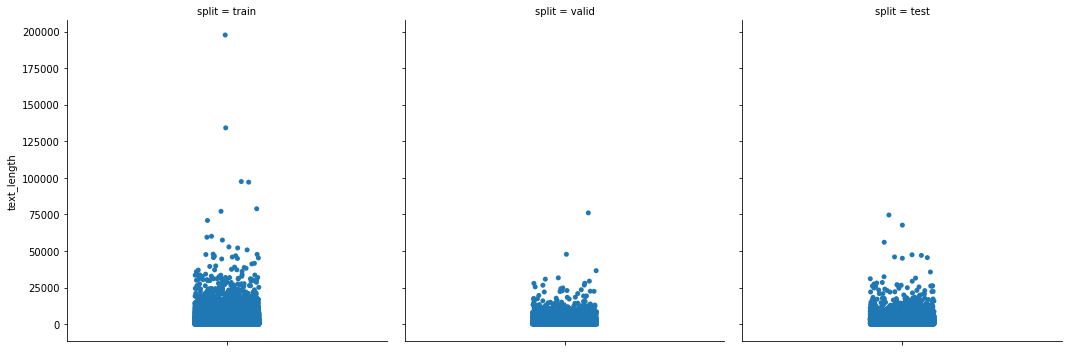

In [219]:
sns.catplot(y='text_length', data=full_df, col='split')

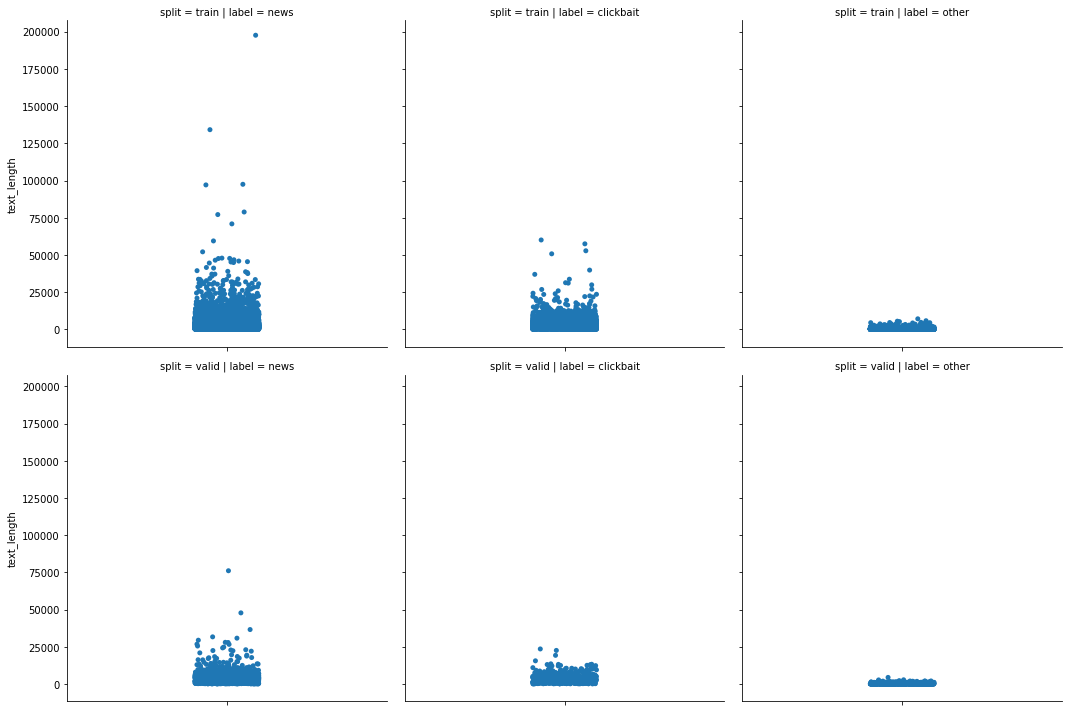

In [229]:
sns.catplot(y='text_length', data=full_train_df, row='split', col='label', kind='strip')

**Missing values**

In [173]:
full_df[full_df.isnull().all(axis=1)]

,title,text,split,title_length,text_length


In [186]:
full_df[full_df.isnull().any(axis=1)].groupby('split')['text'].count()

split
test        0
train    4911
valid     717
Name: text, dtype: int64

In [187]:
full_df[full_df.isnull().any(axis=1)].groupby('split')['title'].count()

split
test     18
train    70
valid     9
Name: title, dtype: int64

In [188]:
full_train_df[full_train_df.isnull().all(axis=1)]

,label,title,text,split,title_length,text_length


In [222]:
full_train_df[full_train_df.isnull().any(axis=1)].groupby(['label', 'split'])['text'].count()

label      split
clickbait  train       0
           valid       0
news       train       0
           valid       0
other      train    4911
           valid     717
Name: text, dtype: int64

In [225]:
full_train_df[full_train_df['label'].isin(['clickbait', 'news'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21029 entries, 0 to 28422
Data columns (total 6 columns):
label           21029 non-null object
title           21029 non-null object
text            20954 non-null object
split           21029 non-null object
title_length    21029 non-null float64
text_length     20954 non-null float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [226]:
full_train_df[full_train_df.isnull().any(axis=1)].groupby(['label', 'split'])['title'].count().sum()

79

**Duplicates**

In [162]:
full_df[full_df.duplicated(['title', 'text'], keep=False)]

,title,text,split,title_length,text_length
15547,NaN,NaN,train,NaN,NaN
16107,NaN,NaN,train,NaN,NaN
16122,NaN,NaN,train,NaN,NaN
17090,NaN,NaN,train,NaN,NaN
17778,NaN,NaN,train,NaN,NaN
18152,NaN,NaN,train,NaN,NaN
18414,NaN,Source:,train,NaN,7.0
18501,NaN,NaN,train,NaN,NaN
19117,NaN,Source:,train,NaN,7.0
19155,NaN,NaN,train,NaN,NaN


In [163]:
full_train_df[full_train_df.duplicated(['title', 'text'], keep=False)]

,label,title,text,split
15547,other,NaN,NaN,train
16107,other,NaN,NaN,train
16122,other,NaN,NaN,train
17090,other,NaN,NaN,train
17778,other,NaN,NaN,train
18152,other,NaN,NaN,train
18414,other,NaN,Source:,train
18501,other,NaN,NaN,train
19117,other,NaN,Source:,train
19155,other,NaN,NaN,train
